# Three Phase Systems

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
        
<img src="./lec5/Slide2.PNG" align="left" width="62%">

In this lecture we will continue the study on power calculations, but the system we are now dealing with will be a three phase system.

The content of this lecture is shown on this slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

        
<img src="./lec5/Slide5.PNG" align="left" width="62%">

This figure shows the strcuture of the EV powertrain we use in every lecture to introduce the topic. As you can see, the knowledge on three phase power can be applied for the power calculation between the inverter and the electrical machine in the EV powertrain.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

        
<img src="./lec5/Slide6.PNG" align="left" width="62%">

The learning objectives of this lecture are shown on this page. After taking this lecture, you're supposed to be able to carry out power calculation in 3-ph systems, and the knowledge on power measurements will help you in the lab practicals of this course.

```
````

## Three phase power system and phase sequence



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
        
<img src="./lec5/Slide7.PNG" align="left" width="62%">

In the last several lectures, we've reviewed both instantaneous power and average power (using phasors) calculation for a single phase system.
A bike dynamo for lighting is a typical single phase device. It has rotating magnetic poles connected to the shaft, when the shaft is rotated by the tire, there will be single phase voltage induced in the stationary coil a-a' (a quantitative explanation to this will be given in the [AC Machine](ac_machine) part of the course). If we connect a constant load to the voltage, we will see that the instantaneous power will be oscillating at a frequency doubling the voltage frequency. The average power is calculated using phasors as $P=\mathbf{VI}^*$.

A symbolic and numeric derivation is shown in the code of [Instantaneous power and average power of single phase system](power_single_phase).

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide8.PNG" align="left" width="62%">

In order to get rid of the power pulsation, it is necessary to use a poly-phase system. The simplest of all poly-phase systems is a two-phase system. Based on the single phase dynamo, if we add another coil b-b' which is identical to be is lagging a-a' by $\pi/2$, we will be able to obtain two induced voltages and the voltage waveform of phase b is lagging phase a by $\pi/2$. If balanced loads are applied to the two voltages, we will obtain a constant instantaneous power, as will be proved later.

Actually, two-phase system was used in the early stage of electrification, since it enables the possibility to start and run electrical machines without oscillation. The two phase generator shown here was installed in the [Niagara hydro power plant in 1895](https://en.wikipedia.org/wiki/Adams_Power_Plant_Transformer_House), which was the first large-scale, alternating current electric generating plant in the world.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide9.PNG" align="left" width="62%">

Now let's check the detailed derivation of the power calculation for the two phase system. Assuming we have the same load impedance of $\mathbf{Z}=|\mathbf{Z}|e^{j\varphi}$ for both phases. If the voltage amplitude is $V_m$, two voltage phasors would be

$$
\begin{align}
\mathbf{V}_a &= \frac{V_m}{\sqrt{2}}\angle 0\\
\mathbf{V}_b &= \frac{V_m}{\sqrt{2}}\angle -\frac{\pi}{2}
\end{align}
$$

The current phasors will be lagging the voltage by $\varphi$:

$$
\begin{align}
\mathbf{I}_a &= \frac{V_m}{\sqrt{2}|\mathbf{Z}|}\angle -\varphi\\
\mathbf{I}_b &= \frac{V_m}{\sqrt{2}|\mathbf{Z}|}\angle -\varphi-\frac{\pi}{2}
\end{align}
$$

So the instantaneous current waveforms are:

$$
\begin{align}
i_a(t) &= \frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\varphi)\\
i_b(t) &= \frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\frac{\pi}{2}-\varphi)
\end{align}
$$

The instantaneous power can be calculated using the trigonometric identities:

$$
\begin{align}
p_a(t) &= v_a(t)i_a(t) = V_m\cos(\omega t)\frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\varphi)\\
&= \frac{V_m^2}{2|\mathbf{Z}|}[\cos\varphi+cos(2\omega t -\varphi)]\\
p_b(t) &= v_b(t)i_b(t) = V_m\cos(\omega t)\frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\frac{\pi}{2}-\varphi)\\
&= \frac{V_m^2}{2|\mathbf{Z}|}[\cos\varphi+cos(2\omega t -\varphi-\pi)]\\
\end{align}
$$

The time varying parts of the two equations have opposite signs. Added together, the total instantaneous power is given as:

$$
p_a+p_b = \frac{V_m^2}{2|\mathbf{Z}|}\cos\varphi=2\frac{|\mathbf{V}|^2}{|\mathbf{Z}|}cos\varphi
$$

which is a constant and the same as the sum of average power calculated using phasors.

Symbolic and numerical derivations are shown in the Python code below.

```
````

In [1]:
%reset -f
# symbolic derivation
from sympy import *

t, phi, V_m, Z = symbols('t, varphi, V_m, Z')
omega = symbols('omega', positive=True)

v_a = V_m*cos(omega*t)
v_b = V_m*cos(omega*t-pi/2)

i_a = V_m/Z*cos(omega*t-phi)
i_b = V_m/Z*cos(omega*t-pi/2-phi)

p_a = v_a*i_a
p_b = v_b*i_b
p_tot = p_a+p_b

print('The total instantaneous power of the two phases is:')
simplify(p_tot)

The total instantaneous power of the two phases is:


V_m**2*cos(varphi)/Z

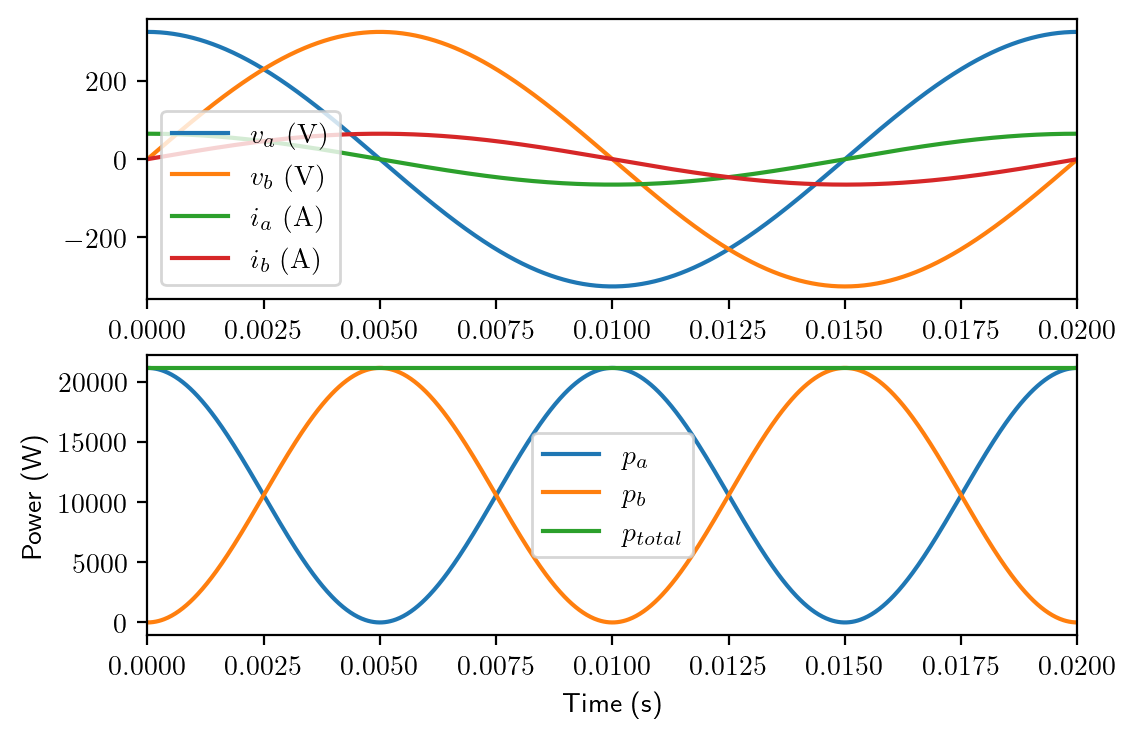

In [2]:
%reset -f
# numerical example
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

f = 50.0
V_m = 230*np.sqrt(2)
R   = 5

t = np.linspace(0, 1/f, 1000)
v_a = V_m*np.cos(2*np.pi*f*t)
v_b = V_m*np.cos(2*np.pi*f*t-np.pi/2)

i_a = v_a/R
i_b = v_b/R

p_a = v_a*i_a
p_b = v_b*i_b

p   = p_a+p_b

plt.figure()
plt.subplot(2,1,1)
plt.plot(t, v_a, label='$v_a~(\mathrm{V})$')
plt.plot(t, v_b, label='$v_b~(\mathrm{V})$')
plt.plot(t, i_a, label='$i_a~(\mathrm{A})$')
plt.plot(t, i_b, label='$i_b~(\mathrm{A})$')
plt.legend()
plt.xlabel('Time (s)')
plt.xlim([0,1/f])

plt.subplot(2,1,2)
plt.plot(t, p_a, label='$p_a$')
plt.plot(t, p_b, label='$p_b$')
plt.plot(t, p, label='$p_{total}$')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.xlim([0,1/f])
plt.legend()
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide10.PNG" align="left" width="62%">

Now let's move on to the three phase (3-ph) system, which is the most commonly used system in modern power systems. To make the system operate in a balanced way, the three phases have a phase difference of $2\pi/3$ between either two of the phases. As shown in the time domain equation and the voltage phasors on this slide. 

In practice, three phase voltages can be generated from a three phase generator as shown on the slide. Three windings a-a', b-b' and c-c' are displaced by $2\pi/3$ in space. This way when the magnet poles rotate, three phase voltages with a phase offset of $2\pi/3$ will be induced.

The state-of-the-art power grids are mostly three phase systems, and three-phase turbo generator or hydro generators are mainly used to power the power grid. As more renewable sources, e.g., wind and solar energy, are used, three phase converters are also used to supply power to the grid, which will be studied in the next module of the course.

Similar to the two phase system, the 3-ph system is also able to deliver a constant instantaneous power flow when balanced loads are applied. We've talked about this briefly in [Instantaneous power, average power and energy](power_single_phase) by studying the case where 3-ph voltage sources are loaded by resistances.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide11.PNG" align="left" width="62%">

Now let's go one step further by checking the 3-ph system supplying an arbitrary balanced load $\mathbf{Z}=|\mathbf{Z}|e^{j\varphi}$. 

Similar to the two-phase case, the three phase currents in time domain can be described as

$$
\begin{align}
i_a(t) &= \frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\varphi)\\
i_b(t) &= \frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\frac{2\pi}{3}-\varphi)\\
i_c(t) &= \frac{V_m}{|\mathbf{Z}|}\cos(\omega t +\frac{2\pi}{3}-\varphi)\\
\end{align}
$$

So the three phase instantaneous power is calculated by applying trigonometric identities:

$$
\begin{align}
p_a(t) &= v_a(t)i_a(t) = V_m\cos(\omega t)\frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\varphi)\\
&= \frac{V_m^2}{2|\mathbf{Z}|}[\cos\varphi+cos(2\omega t -\varphi)]\\
p_b(t) &= v_b(t)i_b(t) = V_m\cos(\omega t-\frac{2\pi}{3})\frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\frac{2\pi}{3}-\varphi)\\
&= \frac{V_m^2}{2|\mathbf{Z}|}[\cos\varphi+cos(2\omega t -\varphi-\frac{4\pi}{3})]\\
p_c(t) &= v_c(t)i_c(t) = V_m\cos(\omega t+\frac{2\pi}{3})\frac{V_m}{|\mathbf{Z}|}\cos(\omega t +\frac{2\pi}{3}-\varphi)\\
&= \frac{V_m^2}{2|\mathbf{Z}|}[\cos\varphi+cos(2\omega t -\varphi+\frac{4\pi}{3})]
\end{align}
$$

Since we know

$$
\cos x +\cos\left(x-\frac{2\pi}{3}\right)+\cos\left(x+\frac{2\pi}{3}\right)=0
$$

The time varying parts in the above three power equations cancel out in the sum, so the total instantaneous power is given as

$$
p_a+p_b+p_c = \frac{3V_m^2}{2|\mathbf{Z}|}\cos\varphi=3\frac{|\mathbf{V}|^2}{|\mathbf{Z}|}\cos\varphi .
$$

which is a constant and agrees with the result obtained from phasor analysis.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide12.PNG" align="left" width="62%">

From the analysis above, we may also calculate the total current flowing from the common node of the sources to the common node of the load impedances (neutral current):

$$
\begin{align}
i_n(t) &= i_a(t)+i_b(t)+i_c(t) \\
&= \frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\varphi)\\
&\quad +\frac{V_m}{|\mathbf{Z}|}\cos(\omega t -\frac{2\pi}{3}-\varphi)\\
&\quad +\frac{V_m}{|\mathbf{Z}|}\cos(\omega t +\frac{2\pi}{3}-\varphi)\\
&= 0
\end{align}
$$

It shows the most important advantage of three-phase systems over two-phase systems: the neutral line can be very thin or completely eliminated since it does not need to carry much current. 

Therefore the advantages of a three-phase system include:
* three-phase power utilises the conductors in a more economical way;
* it results in a constant power flow.

Symbolic and numerical derivations of the three phase power is shown in the code below.

```

````

In [3]:
%reset -f
# three phase power symbolic derivation
from sympy import *

t, phi, V_m, Z = symbols('t, varphi, V_m, Z')
omega = symbols('omega', positive=True)

v_a = V_m*cos(omega*t)
v_b = V_m*cos(omega*t-2*pi/3)
v_c = V_m*cos(omega*t+2*pi/3)


i_a = V_m/Z*cos(omega*t-phi)
i_b = V_m/Z*cos(omega*t-2*pi/3-phi)
i_c = V_m/Z*cos(omega*t+2*pi/3-phi)


p_a = v_a*i_a
p_b = v_b*i_b
p_c = v_c*i_c
p_tot = p_a+p_b+p_c

print('The total instantaneous power of the two phases is:')
simplify(p_tot)

The total instantaneous power of the two phases is:


3*V_m**2*cos(varphi)/(2*Z)

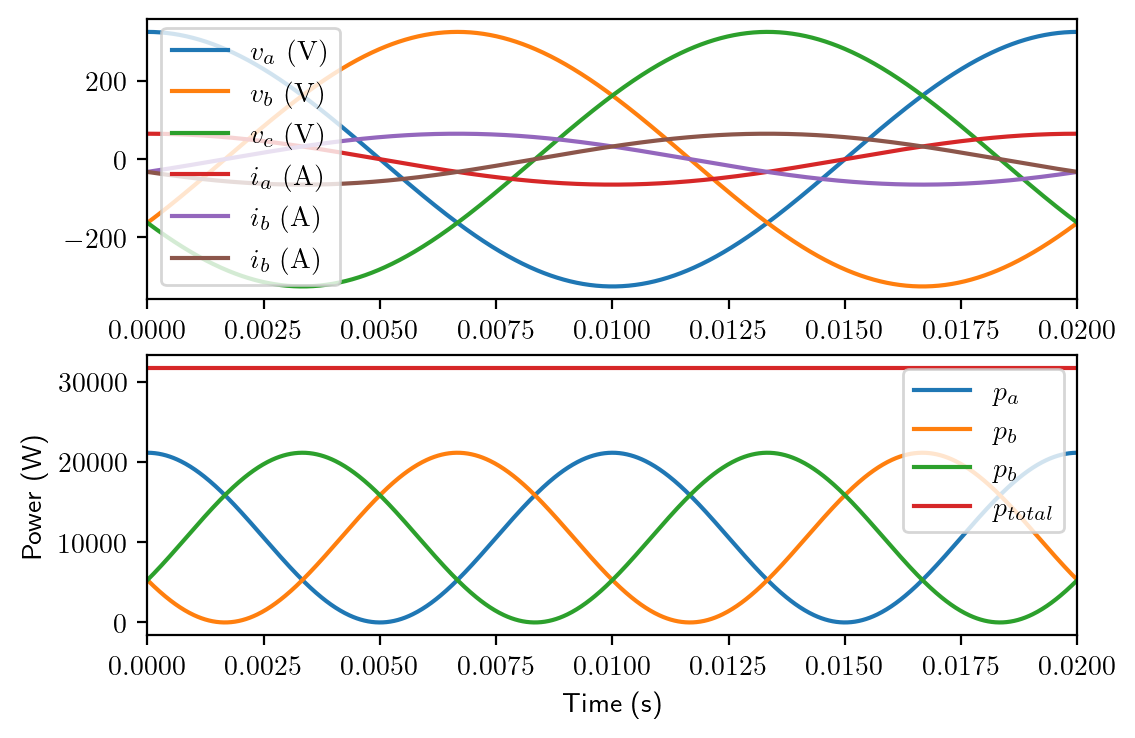

In [4]:
%reset -f
# three phase numerical example
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

f = 50.0
V_m = 230*np.sqrt(2)
R   = 5

t = np.linspace(0, 1/f, 1000)
v_a = V_m*np.cos(2*np.pi*f*t)
v_b = V_m*np.cos(2*np.pi*f*t-np.pi*2/3)
v_c = V_m*np.cos(2*np.pi*f*t+np.pi*2/3)

i_a = v_a/R
i_b = v_b/R
i_c = v_c/R

p_a = v_a*i_a
p_b = v_b*i_b
p_c = v_c*i_c

p   = p_a+p_b+p_c

plt.figure()
plt.subplot(2,1,1)
plt.plot(t, v_a, label='$v_a~(\mathrm{V})$')
plt.plot(t, v_b, label='$v_b~(\mathrm{V})$')
plt.plot(t, v_c, label='$v_c~(\mathrm{V})$')
plt.plot(t, i_a, label='$i_a~(\mathrm{A})$')
plt.plot(t, i_b, label='$i_b~(\mathrm{A})$')
plt.plot(t, i_c, label='$i_b~(\mathrm{A})$')

plt.legend()
plt.xlabel('Time (s)')
plt.xlim([0,1/f])

plt.subplot(2,1,2)
plt.plot(t, p_a, label='$p_a$')
plt.plot(t, p_b, label='$p_b$')
plt.plot(t, p_c, label='$p_b$')
plt.plot(t, p, label='$p_{total}$')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.xlim([0,1/f])
plt.legend()
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide13.PNG" align="left" width="62%">     

It is important to know that the sequence of the three phases are as important as the $2\pi/3$ phase offset. 

The phase sequence of a three-phase power system is defined as the
order in which the voltages in the individual phases peak.

There will be two different types of phase sequence: b is lagging a by $2\pi/3$ and c is lagging b by $2\pi/3$ , which is called a-b-c phase sequence, as shown on the left; or a-c-b, where c is lagging a by $2\pi/3$ , and b is lagging c by $2\pi/3$, as shown on the right.

In the practice, the two phase sequences can be generated simply by reversing the rotational direction of the magnet poles as shown on the top side of the slide.

The results derived above are valid for both phase sequences.

The phase sequence is critical in applications, because it determines the direction of rotation of electric motors, and power sources (generators or converters) can only be safely connected to the power grid if the phase sequence is the same as the power grid.
        
```
````

## Line-line voltages, wye connection, delta connection



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec5/Slide15.PNG" align="left" width="62%">     

The way we connect the three-phase voltage sources to the impedances on the last slides is called a wye or Y connection, since the three sources and the common point (neutral point) form a Y shape.

In the last section, we only addressed the voltages between the phase line and the neutral point, which is called line-neutral voltages. If the rms value of it is $V_\phi$, we are able to write the three phase-neutral voltages in phasors:

$$
\begin{align}
\mathbf{V}_a &= V_\phi\angle 0^\circ\\
\mathbf{V}_b &= V_\phi\angle -120^\circ\\
\mathbf{V}_c &= V_\phi\angle 120^\circ
\end{align}
$$

However, it is also possible to measure the voltage between either two of the three phase lines, which is called **line-line** or line-to-line (or sometimes simply line) voltages:

$$
\begin{align}
\mathbf{V}_{ab} &= \mathbf{V}_a-\mathbf{V}_b \\
&= V_\phi\angle 0^\circ - V_\phi\angle -120^\circ\\
&= V_\phi + \frac{1}{2}V_\phi +  \frac{\sqrt{3}}{2}jV_\phi \\
&= \sqrt{3}V_\phi(\frac{\sqrt{3}}{2} + \frac{1}{2}j) &= \sqrt{3}V_\phi\angle 30^\circ\\
\mathbf{V}_{bc} &= \mathbf{V}_b-\mathbf{V}_c = V_\phi\angle -120^\circ - V_\phi\angle 120^\circ &= \sqrt{3}V_\phi\angle =90^\circ\\
\mathbf{V}_{ca} &= \mathbf{V}_c-\mathbf{V}_a = V_\phi\angle 120^\circ - V_\phi\angle 0^\circ &= \sqrt{3}V_\phi\angle 150^\circ
\end{align}
$$

It can be concluded that for a Y connection:
* The line-line voltage set has a magnitude that is larger than that of the line-neutral by a factor of $\sqrt{3}$;
* The line-line voltages are phase shifted by $30^\circ$ with respect to the line-neutral voltages;
* The line-line voltages also form a three phase set just as line-neutral voltages do. 

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide16.PNG" align="left" width="62%">     

Since the line-line voltages also form a symmetrical three phase set, it indicates that power system components (sources or loads) may be connected either line-neutral, as we presented on the last slides, which is called wye connection, or line-line, which is called delta ($\Delta$), since the three components form a triangle.

To study the two types of connections, it is handy to define **phase quantities**, which are voltages and currents in a given phase, and **line quantities** as the voltages between lines and currents in the lines connected to the sources.

Here we use the subscript $\phi$ for phase quantities and $LL$ or $L$ or line quantities.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide17.PNG" align="left" width="62%">     

Let's first take another look at the Y connection, we already know in such case the line-line voltage magnitude is $\sqrt{3}$ times the phase voltage.
As seen from the figure on the slide, the current in any line is the same as the
current in the corresponding phase, so we have $I_L=I_\phi$.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide18.PNG" align="left" width="62%">     

Then let's check the case for a delta connection. It is obvious that the line-line voltage between any two lines will be the same as the voltage in the corresponding phase, so $V_{LL}=V_\phi$. We have

$$
\begin{align}
\mathbf{I}_{ab} &= I_\phi\angle 120^\circ\\
\mathbf{I}_{bc} &= I_\phi\angle 0^\circ\\
\mathbf{I}_{ca} &= I_\phi\angle -120^\circ
\end{align}
$$

as shown in the phasor diagram on the slide.

For line currents, however, we have to do the same maths as we did for voltages in a Y connection by applying Kirchoff's Law:

$$
\begin{align}
\mathbf{I}_{a} &= \mathbf{I}_{ab}-\mathbf{I}_{ca} \\
               &= I_\phi\angle 120^\circ - I_\phi\angle -120^\circ \\
               &= \sqrt{3}jV_\phi \\
               &= \sqrt{3}I_\phi\angle 90^\circ  \\
\mathbf{I}_{b} &= \mathbf{I}_{bc}-\mathbf{I}_{ab} \\
               &= I_\phi\angle 0^\circ - I_\phi\angle 120^\circ \\
               &= \sqrt{3}I_\phi\angle -30^\circ \\
\mathbf{I}_{c} &= \mathbf{I}_{ca}-\mathbf{I}_{bc} \\
               &= I_\phi\angle -120^\circ - I_\phi\angle 0^\circ \\
               &= \sqrt{3}I_\phi\angle -150^\circ
\end{align}
$$

Therefore, the relationship between the magnitudes of the line and phase currents
in a $\Delta$-connected generator or load is: 

$$
I_L = \sqrt{3}I_\phi.
$$

and the line currents are shifted $30^\circ$ relative to the corresponding phase currents.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide19.PNG" align="left" width="62%">     

Here it summarises the relationship between the phase quantities and the line quantities for Y and $\Delta$ connection for a 3-ph system with a phase sequence of a-b-c. Please be aware that the magnitude relationship is the same for either a-b-c or a-c-b phase sequence, but the phase angle offsets will be opposite for different phase sequences. You may work it out yourself.
```

````

## Active, preactive, and apparanet power (PQS) in three-phase systems

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec5/Slide20.PNG" align="left" width="62%">     

The analysis on Y and $\Delta$ connections enable us to calculate the P, Q and S of the three-phase systems in a straightforward way.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide21.PNG" align="left" width="62%">     

In the last sections we already know the total power in a three phase system can be calculated by summing up the power from all three phases. If the load applied to each phase is $\mathbf{Z}=Ze^{j\varphi}$, the the per phase current is calculated as

$$
\begin{align}
\mathbf{I}_{\varphi}&=\frac{\mathbf{V}_\phi}{Ze^{j\varphi}}\\
&= I_\phi (\cos\varphi-j\sin\varphi)
\end{align}
$$

where $I_\phi = \frac{V_\phi}{Z}$ is the rms current of each phase.

Therefore, the [complex power](complex_power) of each phase is:

$$
\begin{align}
\mathbf{S}_\phi &= P_\phi+jQ_\phi = \mathbf{V}_\phi\mathbf{I}_\phi^* \\
&=V_\phi I_\phi(\cos\varphi+j\sin\varphi)
\end{align}
$$

The total complex power from the three phase is


$$
\begin{align}
\mathbf{S} = 3\mathbf{S}_\phi &= 3(P_\phi+jQ_\phi) = 3\mathbf{V}_\phi\mathbf{I}_\phi^* \\
&=3V_\phi I_\phi(\cos\varphi+j\sin\varphi)
\end{align}
$$

If we replace $V_\phi$ or $I_\phi$ with impedance, we can obtain

$$
\begin{align}
\mathbf{S} &= 3ZI_\phi^2(\cos\varphi+j\sin\varphi)  \\
&= 3\frac{V_\phi^2}{Z}(\cos\varphi+j\sin\varphi)
\end{align}
$$

Accordingly, the total P, Q and S of the three phases can be obtained as shown on the slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide22.PNG" align="left" width="62%">     

The previous derivation is based on phase quantities. Sometimes it is more convenient to use line quantities to calculate the power.

For Y connection, we know $V_\phi = V_{LL}/\sqrt{3}$ and $I_\phi = I_L$, so the total power
is $P = \sqrt{3}V_{LL}I_{L}\cos\varphi$.

For $\Delta$ connection, we know $V_\phi = V_{LL}$ and $I_\phi = I_L/\sqrt{3}$, so the total power is still $P = \sqrt{3}V_{LL}I_{L}\cos\varphi$.

$Q$ and $S$ can be calculated using line quantities in the same way.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide23.PNG" align="left" width="62%">     

Now we know $P = \sqrt{3}V_{LL}I_{L}\cos\varphi$ and $Q = \sqrt{3}V_{LL}I_{L}\sin\varphi$ are valid for both Y and $\Delta$ connections. The power factor can be defined as $\mathrm{pf}=\cos\varphi$, and the power factor angle $\varphi$ is the same as the impedance phase angle.

Here we have to pay attention that $\varphi$ is the phase angle between phase voltage and phase current, not the angle between the line-line voltage and the line current.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide24.PNG" align="left" width="62%">     

The specifications of the three phase power system differ from country to country. In Netherlands, the line to neutral voltage of the power distribution system has a rms value of 230 V. Therefore, the line to line voltage is $230*\sqrt{3} = 400 V$. The frequency is 50 Hz.

There are some typical specifications used in other parts of the world, e.g., in China, 220/380 V and 50 Hz are used; in the USA, 120/208 V and some other levels at 60 Hz are used.

Another specification is the wiring of the three phase system. As you can see, the three-phase power supply may provide access to the neutral point or not, it is possible to make either a 3 wire system (three phase wires) or a 4 wire system (three phase wires+one neutral wire). In Netherlands, both wiring configurations are used.  

Depending on the requirements on the voltage and current, the loads can also be configured in different connections when they are connected to three phase power grid. For high voltage load current load, the load may be configured in $\Delta$, so that the line-to-line source voltage is applied onto one single phase; otherwise for low voltage high current load, a Y connection may be used.
```
````

## Power measurement

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide25.PNG" align="left" width="62%">     

Having studied the methods to calculate the power in the three phase system, now let's see how to measure the power in practice. Usually power is measured by wattmeter, which gives the active power in watts of a given circuit, or power analyser, which is able measure not only active power, but also reactive power and even harmonics in the circuit. In both cases, to measure the electric power flowing to each terminal, a voltage meter or a current meter are necessary. 

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide26.PNG" align="left" width="62%">     

Now let's see how wattmeter or power analysers can be used in various connections. 
For single phase circuit, the connection is straightforward, one wattmeter (voltage meter+current meter) is enough to measure the power.

For three phase systems, there are several different connections for different wiring systems. 
For three phase three wire system without neutral point, we are able to use either two watt meter method or three watt meter method. Here RST is used for phase labels. So the power measured in this configuration would be:

$$
P &= U_1*I_1+U_2*I_2 = U_{RT}*I_R+U_{ST}*I_S \\
  &= (U_R-U_T)*I_R+(U_S-U_T)*I_S \\
  &= U_R*I_R+U_S*I_S-U_T*(I_R+I_S) 
$$

Because there is no neutral line, so $I_R+I_S+I_T=0$, we have

$$
P &= U_R*I_R+U_S*I_S-U_T*(I_R+I_S) \\
  &= U_R*I_R+U_S*I_S+U_T*I_T
$$

which is indeed the total power of the three phases.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide27.PNG" align="left" width="62%">     

In the three phase four wire system, a neutral wire is available, therefore, we are able to measure the true phase (line to neutral) voltage and the line current. Therefore the total power is measured as

$$
P = U1*I2+U2*I2+U3*I3.
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide28.PNG" align="left" width="62%">     

Here it shows some wattmeter and power analyser examples in practice.
```

````

## Examples

`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec5/Slide29.PNG" align="left" width="62%">  

Now let's practice what we've learnt in several examples.

First is an example for motor connection to the three phase system.
As we can see on the nameplate here, the rated voltage for the machine at 50 Hz is 380-420 V for a Y connection, but 220-240 V for a $\Delta$ connection. We know the Dutch distribution system has a line voltage of 400 V, so the machine has to be connected in Y.

We can also see that the rated current for a Y connection is 0.7 A, while for a $\Delta$ connection is 1.2 A, which is also a factor of $\sqrt{3}$ different in magnitude.

```{note}
In practice, if not specifically mentioned, the three phase voltage and current are always given in rms values for the line quantities. For example, the rated voltage and current given in the nameplate of an induction machine above are all line rms values.
```
````

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide30.PNG" align="left" width="62%">  

The second example shows a Y connected generator supplying a Y connected resistive load. Since both sides are connected in Y, we are able to calculate the line current using the phase quantities. Therefore we can have the calculation on the slide.

Here we are also able to calculate the total power using line quantities:

$$
P_{total} = \sqrt{3}*865*10~\mathrm{W} = 15~\mathrm{kW}
$$

which is exactly the same result.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide31.PNG" align="left" width="62%">  

In some cases we have to deal with more complicated systems, e.g., cases where Y connections and delta connections are used together, either in parallel or in series. So it would be handy to transform from one connection to the other.

To transform from one type of connection to the other type, the P and Q should stay the same. In order to derive the correct transformation, let's first review the voltage and current relationship between the line and phase quantities in the two connections.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide32.PNG" align="left" width="62%">  

To have the same P and Q, the line currents should also stay the same before and after the transformation.
Based on the magnitude and phase relationships between the phase and line quantities, we are able to derive the transformation:

$$
\mathbf{Z}_Y = \frac{\mathbf{Z}_\Delta}{3}.
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec5/Slide33.PNG" align="left" width="62%">  

Now let's apply the transformation in this example. The three phase source in Y connection is feeding a delta load of $Z_\phi=12+j9~\Omega$ via three wires. The impedance of each wire is $0.06+j0.12~\Omega$. 

To solve the line current, and load voltage, we have to first transform the $\Delta$ connected load to a Y connection so that we are able to simplify the circuit to a Y-Y system.

Please work out this example yourself, then click below for the correct answers. Code for the calculation is as follows.

```
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

```{admonition} Click here for soultion
:class: tip, dropdown

<img src="./lec5/Slide34.PNG" align="left" width="62%">  
<img src="./lec5/Slide35.PNG" align="left" width="62%">  

```
````

`````

In [5]:
%reset -f
import cmath
V_ph = 120.0
Z_ph = 12.0+1j*9.0
Z_wire = 0.06+1j*0.12

Z_Y = Z_ph/3 # transform to Y

Z_series = Z_wire + Z_Y # total impedance in series per phase
I_L      = V_ph/Z_series
print('The magnitude of the line current is {:.3f} A.'.format(abs(I_L)))

# calculate voltage on the load side

V_phi_load_Y = V_ph - Z_wire*I_L  # calculate the phase voltage on the load side in Y
V_phi_load_Delta = cmath.sqrt(3)*V_phi_load_Y
print('The magnitude of the load line voltage is {:.3f} V.'.format(abs(V_phi_load_Delta)))
# load connected in delta, so line voltage is the same as phase voltage
print('The magnitude of the load phase voltage is {:.3f} V.'.format(abs(V_phi_load_Delta)))

The magnitude of the line current is 23.436 A.
The magnitude of the load line voltage is 202.961 V.
The magnitude of the load phase voltage is 202.961 V.
